In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter('ignore')

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 19.9 MB/s eta 0:00:00


In [4]:
import koreanize_matplotlib

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 데이터 업로드

1. 고장신고내역
    - 등록일시 기준으로 월 별 고장접수 분석
2. 대여소별 이용정보
    - 기준년월 기준으로 월 별 반납건수 분석

## 고장신고내역 파일 업로드

In [ ]:
# 엑셀 이용하여 1차 전처리 후 업로드
#    '등록일시' 날짜로 변경
#     '구분' 컬럼명 통일

In [39]:
# 2023년
고장내역_23_1_6_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/스프린트미션/프로젝트1/data/raw_data/고장신고 내역/서울시 공공자전거 고장신고 내역_23.1-6.xlsx'
고장내역_23_1_6 = pd.read_excel(고장내역_23_1_6_data_path)

고장내역_23_7_10_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/스프린트미션/프로젝트1/data/raw_data/고장신고 내역/서울시 공공자전거 고장신고 내역_23.7-10.xlsx'
고장내역_23_7_10 = pd.read_excel(고장내역_23_7_10_data_path)

고장내역_23_11_12_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/스프린트미션/프로젝트1/data/raw_data/고장신고 내역/서울시 공공자전거 고장신고 내역_23.11-12.xlsx'
고장내역_23_11_12= pd.read_excel(고장내역_23_11_12_data_path)

# 2024년
고장내역_24_1_6_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/스프린트미션/프로젝트1/data/raw_data/고장신고 내역/서울시 공공자전거 고장신고 내역_2401-2406.xlsx'
고장내역_24_1_6 = pd.read_excel(고장내역_24_1_6_data_path)

고장내역_24_7_12_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/스프린트미션/프로젝트1/data/raw_data/고장신고 내역/서울시 공공자전거 고장신고 내역_2407-2412.xlsx'
고장내역_24_7_12 = pd.read_excel(고장내역_24_7_12_data_path)


## 대여소별 이용정보 파일 업로드

In [ ]:
# 엑셀에서 1차 전처리 후 업로드
#   2023년 1~6월 데이터 '반납건수' 숫자타입으로 변환
#   '-'로 입력되어있는 Nan값 0으로 대체

In [40]:
# 2023년
대여소_23_1_6_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/스프린트미션/프로젝트1/data/raw_data/대여소별 이용정보/서울특별시 공공자전거 대여소별 이용정보(월별)_23.1-6.xlsx'
대여소_23_1_6 = pd.read_excel(대여소_23_1_6_data_path)

대여소_23_7_12_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/스프린트미션/프로젝트1/data/raw_data/대여소별 이용정보/서울특별시 공공자전거 대여소별 이용정보(월별)_23.7-12.csv'
대여소_23_7_12 = pd.read_csv(대여소_23_7_12_data_path, encoding='cp949')

# 2024
대여소_24_1_6_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/스프린트미션/프로젝트1/data/raw_data/대여소별 이용정보/서울특별시 공공자전거 대여소별 이용정보(월별)_24.1-6.csv'
대여소_24_1_6 = pd.read_csv(대여소_24_1_6_data_path, encoding='cp949')

대여소_24_7_12_data_path = '/content/drive/MyDrive/코드잇_데이터분석_6기/스프린트미션/프로젝트1/data/raw_data/대여소별 이용정보/대여소별 이용정보(월별)_24.7-12.csv'
대여소_24_7_12 = pd.read_csv(대여소_24_7_12_data_path, encoding='cp949')

## 파일 통합

In [42]:
# 고장신고 통합파일
fault_reports = pd.concat(
    [고장내역_23_1_6, 고장내역_23_7_10, 고장내역_23_11_12, 고장내역_24_1_6, 고장내역_24_7_12],
    axis=0,
    ignore_index=True)

In [43]:
# 대여소 통합파일
station_df = pd.concat(
    [대여소_23_1_6, 대여소_23_7_12,대여소_24_1_6, 대여소_24_7_12],
    axis=0,
    ignore_index=True)

# 데이터 전처리

## 통합파일 중복 확인

In [ ]:
# 고장신고 파일의 문제점 -> 하나의 자전거에서 2개 이상의 구분이 있을 시 열러번 등록 -> 데이터 중복 발생
# '자전거번호', '등록일시' 기준으로 중복 제거
# 334,759 개 -> 292865 개  => 41,894 개의 중복 제거

In [44]:
# 전처리 전 데이터 크기
fault_reports.shape[0], station_df.shape[0]

(334759, 65473)

In [11]:
# 고장신고 중복 문제 발견 (동일한 자전거, 동일한 등록일시, **다른 구분** <- 단순히 신고접수를 카운트 하는 용도라 중복으로 간주)
fault_reports.head(2)

,자전거번호,등록일시,구분
0,SPB-62819,2023-01-01 00:01:00,안장
1,SPB-62819,2023-01-01 00:01:00,페달


In [45]:
# 자전거번호와 등록일시 기준으로 구분값 중복제거
fault_reports = fault_reports.drop_duplicates(subset=['자전거번호', '등록일시']).reset_index(drop=True)
fault_reports.shape[0]

292865

In [46]:
station_df.head(2)

,자치구,대여소명,기준년월,대여건수,반납건수
0,강서구,3789. 염창나들목,202301,1,0
1,성동구,9979. 테스트 대여소,202303,2,0


In [47]:
# 대여소 데이터 중복값 없음
station_df.duplicated().sum()

0

## 대여소 데이터 형변환

In [48]:
# 분석에 불필요한 컬럼들 제거 -> 대여소명, 대여건수 제거
station = station_df[['자치구', '기준년월', '반납건수']]

In [49]:
# 데이터 타입 확인
station.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65473 entries, 0 to 65472
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   자치구     65473 non-null  object
 1   기준년월    65473 non-null  int64 
 2   반납건수    65473 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 1.5+ MB


In [50]:
# 기준년월 시간으로 변환
station['기준년월'] = pd.to_datetime(station['기준년월'].astype(str), format='%Y%m')
station['기준년월'] = station['기준년월'].dt.strftime('%Y-%m')
station['기준년월'] = pd.to_datetime(station['기준년월'])

In [51]:
# '년''월' 컬럼 생성 -> groupby위한 용도
station['년'] = pd.to_datetime(station['기준년월']).dt.year
station['월'] = pd.to_datetime(station['기준년월']).dt.month

In [52]:
station.head()

,자치구,기준년월,반납건수,년,월
0,강서구,2023-01-01,0,2023,1
1,성동구,2023-03-01,0,2023,3
2,서초구,2023-06-01,0,2023,6
3,광진구,2023-05-01,19668,2023,5
4,마포구,2023-05-01,19536,2023,5


In [53]:
# 대여소 정보를 이용, '년''월'을 기준으로 '반납건수' 합산 -> 한 달 동안의 총 반납건수 산출
# 월 단위 따릉이 총 이용건수 활용을 위해 만들어두기

total_return_month = station.groupby(['년', '월'])['반납건수'].sum().reset_index()
total_return_month.head()

,년,월,반납건수
0,2023,1,1564881
1,2023,2,2222672
2,2023,3,3866833
3,2023,4,3893425
4,2023,5,4931165


In [54]:
# 각 자치구의 월 단위 이용건수  합산
station_groupby_ym = station.groupby(['자치구', '기준년월'])['반납건수'].sum().reset_index()

In [55]:
station_groupby_ym

,자치구,기준년월,반납건수
0,강남구,2023-01-01,43978
1,강남구,2023-02-01,66220
2,강남구,2023-03-01,112377
3,강남구,2023-04-01,120936
4,강남구,2023-05-01,149110
...,...,...,...
595,중랑구,2024-08-01,113689
596,중랑구,2024-09-01,121580
597,중랑구,2024-10-01,133384
598,중랑구,2024-11-01,100217


In [56]:
# '년','월' 컬럼 생성
station_groupby_ym['년'] = station_groupby_ym['기준년월'].dt.year
station_groupby_ym['월'] = station_groupby_ym['기준년월'].dt.month

In [57]:
station_groupby_ym.head(2)

,자치구,기준년월,반납건수,년,월
0,강남구,2023-01-01,43978,2023,1
1,강남구,2023-02-01,66220,2023,2


In [58]:
# 분석용
# 각 자치구 월 별 이용건수
monthly_count_by_county = station_groupby_ym[['년', '월', '자치구', '반납건수']]
monthly_count_by_county.head(2)

,년,월,자치구,반납건수
0,2023,1,강남구,43978
1,2023,2,강남구,66220


### 고장신고  데이터 형변환

In [59]:
# 2023~2024년 총 고장신고 건수 (292,865 건)

In [60]:
fault.shape[0]

292865

In [61]:
fault = fault_reports.copy()
fault.head()

,자전거번호,등록일시,구분
0,SPB-62819,2023-01-01 00:01:00,안장
1,SPB-32382,2023-01-01 00:24:00,타이어
2,SPB-81126,2023-01-01 01:20:00,단말기
3,SPB-45763,2023-01-01 01:49:00,체인
4,SPB-65315,2023-01-01 02:20:00,안장


In [62]:
# 초단위까지 나와있는 데이트를 년-월-일 로 변환
fault['등록일시'] = pd.to_datetime(fault['등록일시']).dt.date
fault.head(2)

,자전거번호,등록일시,구분
0,SPB-62819,2023-01-01,안장
1,SPB-32382,2023-01-01,타이어


In [63]:
# groupby를 위해 '년', '월' 컬럼 만들기
fault['년'] = pd.to_datetime(fault['등록일시']).dt.year
fault['월'] = pd.to_datetime(fault['등록일시']).dt.month
fault.head()

,자전거번호,등록일시,구분,년,월
0,SPB-62819,2023-01-01,안장,2023,1
1,SPB-32382,2023-01-01,타이어,2023,1
2,SPB-81126,2023-01-01,단말기,2023,1
3,SPB-45763,2023-01-01,체인,2023,1
4,SPB-65315,2023-01-01,안장,2023,1


In [64]:
# 2023년 1~ 2024년 12월까지 고장신고 통합본 -> 추 후 자전거/자전거고장사유 분석에 필요할 수 있어 파일 만들어놓기
fault_reason_24_months = fault[['등록일시', '년','월', '자전거번호', '구분']]
fault_reason_24_months.head(2)

,등록일시,년,월,자전거번호,구분
0,2023-01-01,2023,1,SPB-62819,안장
1,2023-01-01,2023,1,SPB-32382,타이어


In [65]:
# 년, 월 기준으로 총 고장 신고 건수 구하기
monthly_fault_count = fault.groupby(['년', '월']).count().reset_index()
monthly_fault_count['고장신고'] =  monthly_fault_count['구분']
monthly_fault_count = monthly_fault_count.drop(columns=['자전거번호', '등록일시', '구분'])
monthly_fault_count.head(2)

,년,월,고장신고
0,2023,1,7501
1,2023,2,7193


In [66]:
# 카운트가 잘 되었는지 확인작업
# 고장신고의 총 합이 292,865 이어야함
monthly_fault_count['고장신고'].sum()

292865

## 데이터 병합하기

In [67]:
monthly_count_by_county.head(2)

,년,월,자치구,반납건수
0,2023,1,강남구,43978
1,2023,2,강남구,66220


In [68]:
monthly_fault_count.head(2)

,년,월,고장신고
0,2023,1,7501
1,2023,2,7193


In [69]:
# monthly_count_by_county + monthly_fault_count['고장신고']
month_rate = monthly_count_by_county.merge(monthly_fault_count[['년', '월', '고장신고']], on=['년', '월'], how='left')
month_rate

,년,월,자치구,반납건수,고장신고
0,2023,1,강남구,43978,7501
1,2023,2,강남구,66220,7193
2,2023,3,강남구,112377,12402
3,2023,4,강남구,120936,13479
4,2023,5,강남구,149110,16710
...,...,...,...,...,...
595,2024,8,중랑구,113689,13146
596,2024,9,중랑구,121580,15239
597,2024,10,중랑구,133384,16581
598,2024,11,중랑구,100217,10472


In [70]:
month_rate.to_csv('2023-2024 자치구별 대여건_고장신고건.csv', index=False, encoding='utf-8-sig')


In [74]:
# 월 별 고장률 계산하기
month_rate['고장률'] = (month_rate['고장신고'] / month_rate['반납건수']) * 100

In [75]:
month_rate

,년,월,자치구,반납건수,고장신고,고장률
0,2023,1,강남구,43978,7501,17.056255
1,2023,2,강남구,66220,7193,10.862277
2,2023,3,강남구,112377,12402,11.036066
3,2023,4,강남구,120936,13479,11.145565
4,2023,5,강남구,149110,16710,11.206492
...,...,...,...,...,...,...
595,2024,8,중랑구,113689,13146,11.563124
596,2024,9,중랑구,121580,15239,12.534134
597,2024,10,중랑구,133384,16581,12.431026
598,2024,11,중랑구,100217,10472,10.449325


In [76]:
month_rate['고장률'].describe()

,고장률
count,600.000000
mean,11.241046
std,5.597260
min,2.093813
25%,6.910971
50%,10.864104
75%,15.347921
max,31.777166


# 시각화

In [ ]:
# 연도별 월별

In [81]:
# 연도별 월별 평균 고장률 계산 (피벗 테이블 형태로 변환)
yearly_monthly_fault_rate = month_rate.groupby(["년", "월"])["고장률"].mean().unstack(level=0)
yearly_monthly_fault_rate

년,2023,2024
월,,
1,16.092554,11.930543
2,10.656396,8.894326
3,10.522724,9.172085
4,11.295780,10.656049
5,11.062073,11.717410
6,10.910643,11.484106
7,11.551170,11.135891
8,12.442954,11.309114
9,8.682829,12.217395


In [82]:
yearly_monthly_fault_rate.to_csv('2023-2024 월별 고장신고율.csv', index=False, encoding='utf-8-sig')


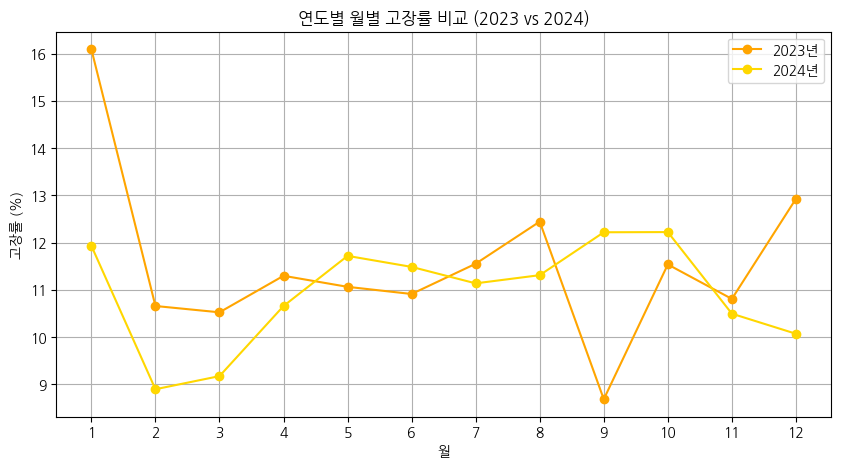

In [78]:
# 라인 그래프 그리기 (노랑 & 오렌지 색상 적용)
plt.figure(figsize=(10, 5))

# 원하는 색상 지정
colors = {2023: 'orange', 2024: 'gold'}  # 2023 = 오렌지, 2024 = 노랑

# 각 연도별로 선 그래프 추가
for year in yearly_monthly_fault_rate.columns:
    plt.plot(yearly_monthly_fault_rate.index, yearly_monthly_fault_rate[year],
             marker='o', linestyle='-', color=colors[year], label=f"{year}년")

# 그래프 꾸미기
plt.xlabel("월")
plt.ylabel("고장률 (%)")
plt.title("연도별 월별 고장률 비교 (2023 vs 2024)")
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()

# 그래프 출력
plt.show()